# import library yang digunakan

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Read dataset

In [3]:
df = pd.read_csv("vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## clean data

In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.dropna(inplace=True)

df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## #subset dan scale data

In [8]:
df_ = df[['NA_Sales','EU_Sales']]
df_ = df_.values

ss = StandardScaler()
scaled = ss.fit_transform(df_)

# Hierarchihcal Clustering

## menentukan jumlah cluster

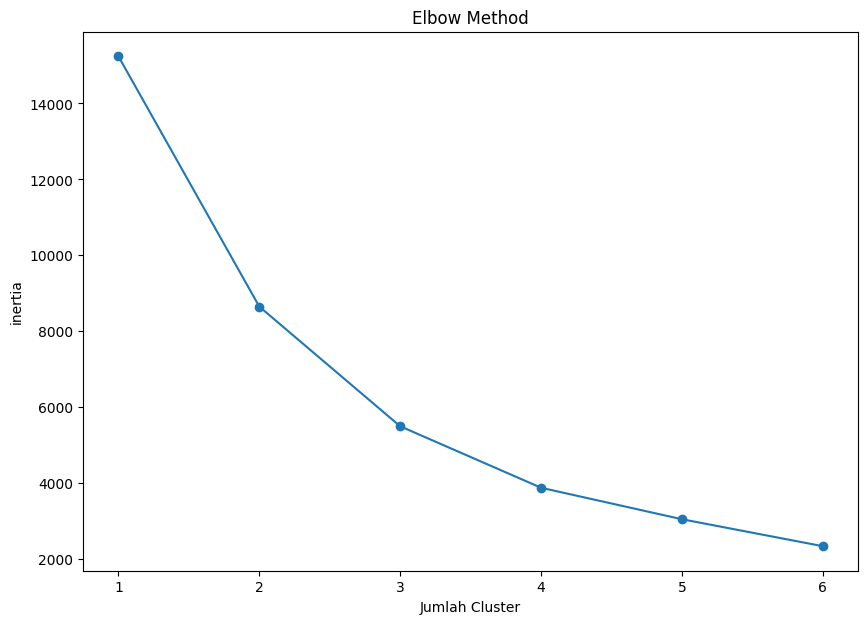

In [9]:
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(df_)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()

## jumlah n = 3

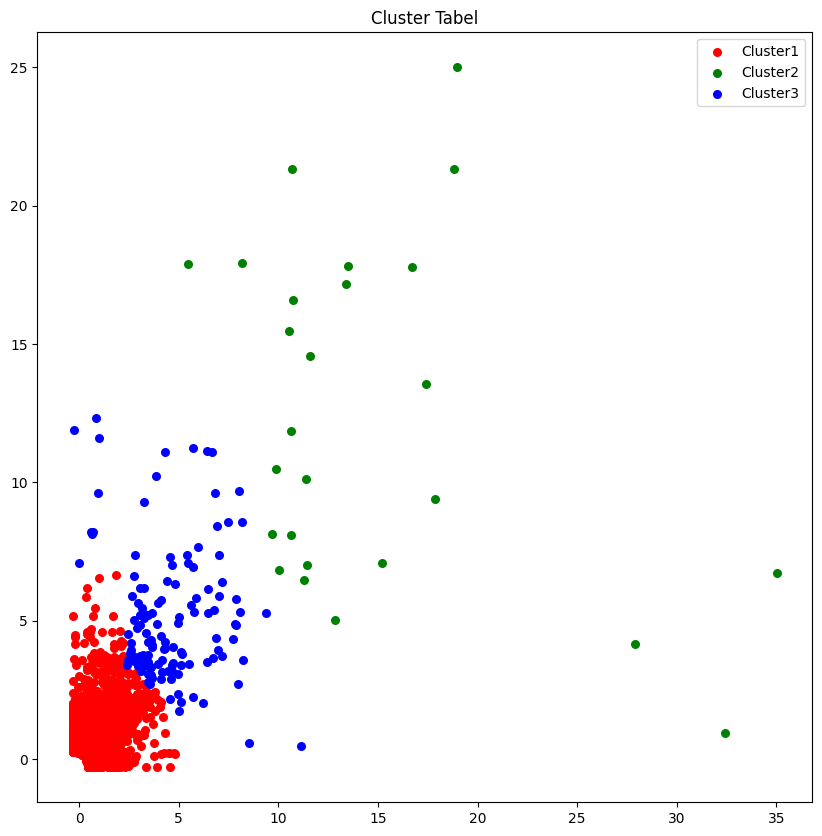

In [10]:
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

AC = HC.fit_predict(scaled)
#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scaled[AC==0, 0],scaled[AC==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[AC==1, 0],scaled[AC==1, 1], s=30, c='green', label ='Cluster2')
plt.scatter(scaled[AC==2, 0],scaled[AC==2, 1], s=30, c='blue', label ='Cluster3')

plt.title("Cluster Tabel")
plt.legend()
plt.show()

## dendogram

In [ ]:
HR_linkrase = linkage(scaled, method='ward')
plt.figure(figsize=(10,10))
dendrogram(HR_linkrase)
plt.title("Dendrogram")
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")
plt.show()